In [1]:
# Viz for stereotypy single column heatmap computed using cells from the 8dim sphere

In [2]:
!date

Wed Feb 16 11:31:29 PST 2022


In [3]:
!pwd

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/FigureVariation


In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from skimage import io as skio
import matplotlib.pyplot as plt
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

# import mouskatools

In [5]:
# Controller form cvapipe_analysis
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
control = controller.Controller(general.load_config_file(path_config))
device = io.LocalStagingIO(control)
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [6]:
variables = control.get_variables_values_for_aggregation()
variables.update({"shape_mode": ["NdSphere"], "mpId": [control.get_center_map_point_index()]})
space = shapespace.ShapeSpaceBasic(control)
df = space.get_aggregated_df(variables).drop(columns=["structure"]).drop_duplicates().reset_index(drop=True)
df

,shape_mode,mpId,aggtype,alias
0,NdSphere,5,avg,STR


'avg-STR-NdSphere-5'

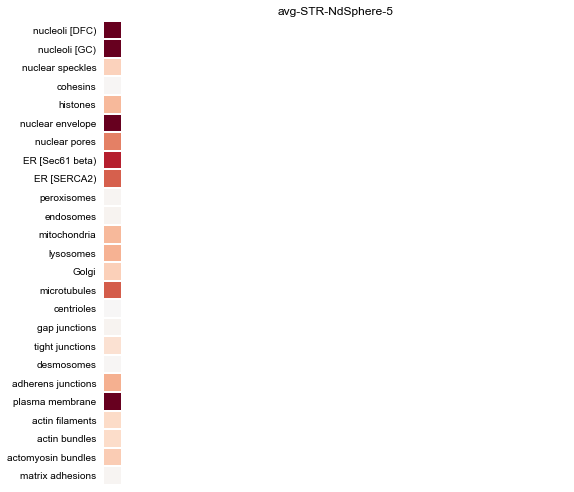

In [9]:
row = df.loc[0]
df_corr = device.read_corelation_matrix(row)
genes = control.get_gene_names()
pmaker = plotting.ConcordancePlotMaker(control)
pmaker.set_row(row)
pmaker.set_heatmap_min_max_values(-0.2, 0.2)
corr = pmaker.get_aggregated_matrix_from_df(genes, df_corr)
pmaker.make_heatmap(np.diag(corr).reshape(-1,1), display=True)

In [11]:
fig, prefix = pmaker.figs[0]
fig.savefig(f"FigureVariation2_ster.pdf")

In [24]:
rank = [1+np.argsort(np.diag(corr))[::-1].tolist().index(g) for g, _ in enumerate(genes)]
np.savetxt(f"FigureVariation2_ster.txt", rank, fmt='%d')

In [25]:
!ls

FigureVariation1.ipynb	   FigureVariation2_ster.txt
FigureVariation2.ipynb	   VizCorrelationMatrix_htmp.png
FigureVariation2_ster.pdf
